# **Data Collection**

## Objectives

* Obtain an appropriate diabetes dataset from Kaggle
* Download and save the dataset
* Inspect and import the dataset, extracting into the file path outputs/datasets/collection

## Inputs

* Using the Kaggle API to download the source data from [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
* Authentication token for the Kaggle JSON file

## Outputs

* The purpose of this notebook is to collect the pre-processed dataset as a .csv and import to the following directory:
    * outputs/datasets/collection/diabetes.csv

## Additional Comments

* This notebook falls under the CRISP-DM of Data Collection
* The dataset is derived from a publicly available dataset on Kaggle. As this is publicly available there are no ethical or privacy concerns and can therefor be used in the repository. 


---

# Change working directory

* As the notebooks are stored in the subfolder 'jupyter_notebooks' we therefore, when running the notebook in the editor, need to change the working directory.

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/pp5-diabetes-prediction'

# Importing the Source Data from Kaggle

* We begin by importing the diabetes dataset from Kaggle.

Install Kaggle package 1.5.12

In [4]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 13.0 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=98154b83b1baa99d54d36902c994936d5d7fe0fa2384e42cd5f536527f003abe
  Stored in directory: /home/gitpod/.cache/pip/wheels/03/f3/c7/fc5a63bb33d22177609b06c5b4c714b5eb3f1b195ce9dc5e47
Successfully built kaggle


* Next we upload the JSON authentication token from Kaggle to the root directory.
* Then the below code is run to establish the code cell being recognised.
* Checking that the kaggle.json is included in the .gitignore so that it is not viewable.

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json


* The dataset used for the diabetes prediction was sourced [Here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
* The dataset as well as the destination folder is then defined.

In [6]:
KaggleDatasetPath = "uciml/pima-indians-diabetes-database"
DestinationFolder = "inputs/datasets/raw"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

  0%|                                               | 0.00/8.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.91k/8.91k [00:00<00:00, 13.2MB/s]


* This will create a zip file containing the dataset from Kaggle.
* Next we need to extract the contents from the zip file.
* The kaggle.json file would then need to be removed but in this case it has been included in the .gitignore so this step is not necessary and is readily available if required to re-access.

In [7]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder}

Archive:  inputs/datasets/raw/pima-indians-diabetes-database.zip
  inflating: inputs/datasets/raw/diabetes.csv  


* Now that the contents have been extracted we can now transition to inspecting the dataset.

---

# Data Inspection

* The next steps involve loading and inspecting the diabetes dataset.
* A Pandas dataframe is declared using the diabetes dataset using `read_csv()`
* The first five rows will be displayed using `head()`

In [8]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


5 rows and 9 columns are displayed

* The information regarding the data type is then shown

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Dataset description

* From this we can see that the dataset contains 768 records and 9 feature sets which are explained below.

    * **Pregnancies** - *The number of times pregnant*
    * **Glucose** - *Plasma glucose concentration using a glucose tolerance test*
    * **BloodPressure** - *Diastolic blood pressure measured in mm Hg*
    * **SkinThickness** - *Tricep skin fold thickness measured in mm*
    * **Insulin** - *2-hour serum insulin measured in mu U/ml*
    * **BMI** - *Body Mass Index measured in kg/m^2*
    * **DiabetesPedigreeFunction** - *Scores the likeliness of diabetes based on family history*
    * **Age** - *The age of the subject*
    * **Outcome** - *Class variable of 0 (for non-diabetic) and 1 (for diabetic)*<br>
<br>
* 768 records would typically be regarded as a small dataset however, it should be sufficient for our needs to train a machine learning model.
* From this data we can see that certain features have a value of 0 which would not be possible for biomarkers such as Skin thickness, glucose, blood pressure and BMI and was likely to be missing values represented as zero in the dataset.
* These zero values will either need to be removed from the dataset or replaced by imputing with a median value. As the dataset is already small, imputing will be opted for in the Data Cleaning stage later on.
* In order to see just how many zeros are contained in each column we will make use of exploratory data analysis in the form of a violin plot to visualise this along with a count to supplement the visual with an exact figure.

##### Violin plot and count of zeros for Pregnancies

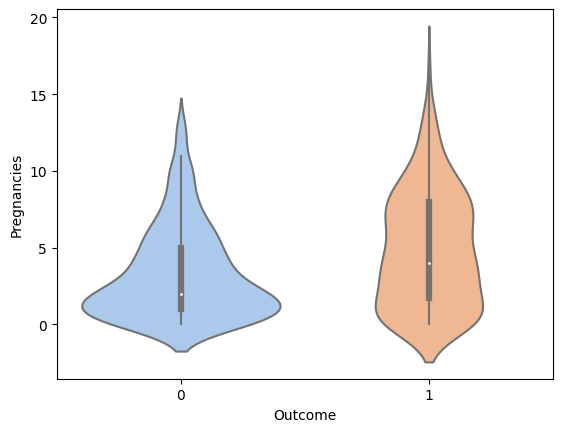

Total count of Zero: 111


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

sns.violinplot(x='Outcome', y='Pregnancies', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Pregnancies[df.Pregnancies==0].count())


* From this we can see that pregnancies were higher in non-diabetic subjects compared to that of diabetics. With a total count of 111 zeros. Nothing will need to be done with this data as it is not an abnormal occurance.

##### Violin plot and count of zeros for Glucose

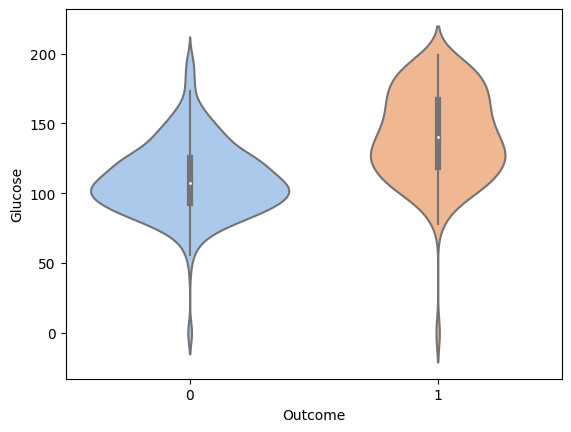

Total count of Zero: 5


In [62]:
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.Glucose[df.Glucose==0].count())

* From this we can see that there was a very small amount of zero values however this would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for BloodPressure

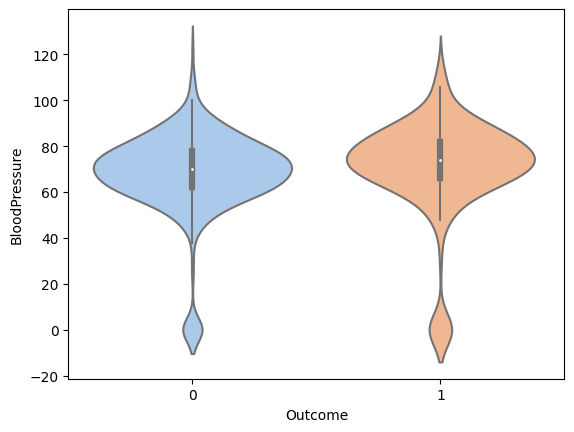

Total count of Zero: 35


In [64]:
sns.violinplot(x='Outcome', y='BloodPressure', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.BloodPressure[df.BloodPressure==0].count())

* From this we can see the lower portion of the violin plot gives us an indication of 0 values within this feature for both diabetics and non-diabetics with the total count being 35 zero values. This would be deemed as abnormal from a biological perspective and would need to be imputed with a median value during the Data Cleaning phase ready for training the machine learning model.

##### Violin plot and count of zeros for SkinThickness

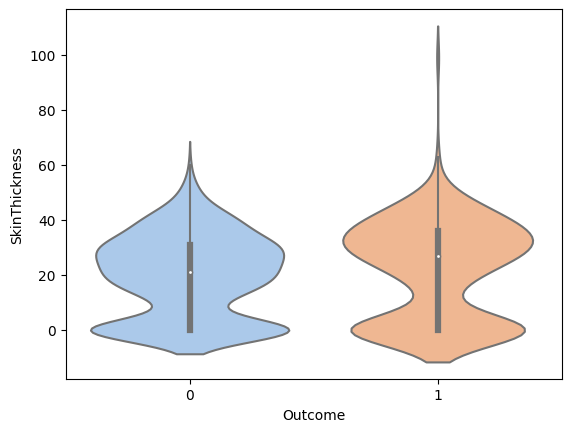

Total count of Zero: 227


In [63]:
sns.violinplot(x='Outcome', y='SkinThickness', data=df, palette='pastel', split=True)
plt.show()
print(f"Total count of Zero:", df.SkinThickness[df.SkinThickness==0].count())

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
